<a href="https://colab.research.google.com/github/CrisGiacomazzi/Sentiment-Analysis-in-Pharmaceutical-Industry/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip -qq install ucimlrepo

In [6]:
pip -qq install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.1 MB/s eta 0:00:00


In [21]:
from ucimlrepo import fetch_ucirepo
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Access UCI dataset
drug_reviews_drugs_com = fetch_ucirepo(id=462)

# Data
X = drug_reviews_drugs_com.data.features
y = drug_reviews_drugs_com.data.targets

# Metadata and variable information
print(drug_reviews_drugs_com.metadata)
print(drug_reviews_drugs_com.variables)

# Create a DataFrame to work with text data
df = pd.concat([X, y], axis=1)

# Check for the column with text reviews (adjust column name as per the dataset)
print(df.head())  # Inspect the dataset to find the relevant text column
text_column = "review"  # Replace with the actual column name containing the reviews

# Initialize sentiment analyzers
vader_analyzer = SentimentIntensityAnalyzer()

# Add sentiment columns
sentiments = {"TextBlob_Sentiment": [], "VADER_Sentiment": []}

for review in df[text_column]:
    # Ensure text is not null
    if pd.notnull(review):
        # TextBlob Sentiment
        blob = TextBlob(review)
        textblob_polarity = blob.sentiment.polarity
        if textblob_polarity > 0:
            textblob_sentiment = "Positive"
        elif textblob_polarity < 0:
            textblob_sentiment = "Negative"
        else:
            textblob_sentiment = "Neutral"
        sentiments["TextBlob_Sentiment"].append(textblob_sentiment)

        # VADER Sentiment
        vader_scores = vader_analyzer.polarity_scores(review)
        vader_compound = vader_scores["compound"]
        if vader_compound > 0.05:
            vader_sentiment = "Positive"
        elif vader_compound < -0.05:
            vader_sentiment = "Negative"
        else:
            vader_sentiment = "Neutral"
        sentiments["VADER_Sentiment"].append(vader_sentiment)
    else:
        sentiments["TextBlob_Sentiment"].append("Neutral")
        sentiments["VADER_Sentiment"].append("Neutral")

# Add sentiment results to the DataFrame
df["TextBlob_Sentiment"] = sentiments["TextBlob_Sentiment"]
df["VADER_Sentiment"] = sentiments["VADER_Sentiment"]

# Display the DataFrame with added sentiment columns
print(df.head())

# Save the updated DataFrame to a CSV for further analysis (optional)
df.to_csv("drug_reviews_with_sentiment.csv", index=False)


{'uci_id': 462, 'name': 'Drug Reviews (Drugs.com)', 'repository_url': 'https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com', 'data_url': 'https://archive.ics.uci.edu/static/public/462/data.csv', 'abstract': 'The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Text'], 'num_instances': 215063, 'num_features': 6, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5SK5S', 'creators': ['Surya Kallumadi', 'Felix Grer'], 'intro_paper': {'ID': 407, 'type': 'NATIVE', 'title': 'Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data 

Top 10 Drugs with the Highest Negative Sentiments:
Sentiment                           Negative  Neutral  Positive
drugName                                                       
Levonorgestrel                          2600      127      2203
Etonogestrel                            2161      103      2157
Ethinyl estradiol / norethindrone       1914       81      1758
Nexplanon                               1472       63      1357
Ethinyl estradiol / norgestimate        1409       84      1297
Ethinyl estradiol / levonorgestrel      1255       67      1181
Sertraline                              1019       56       793
Miconazole                               908       22       414
Escitalopram                             890       45       812
Venlafaxine                              791       38       509


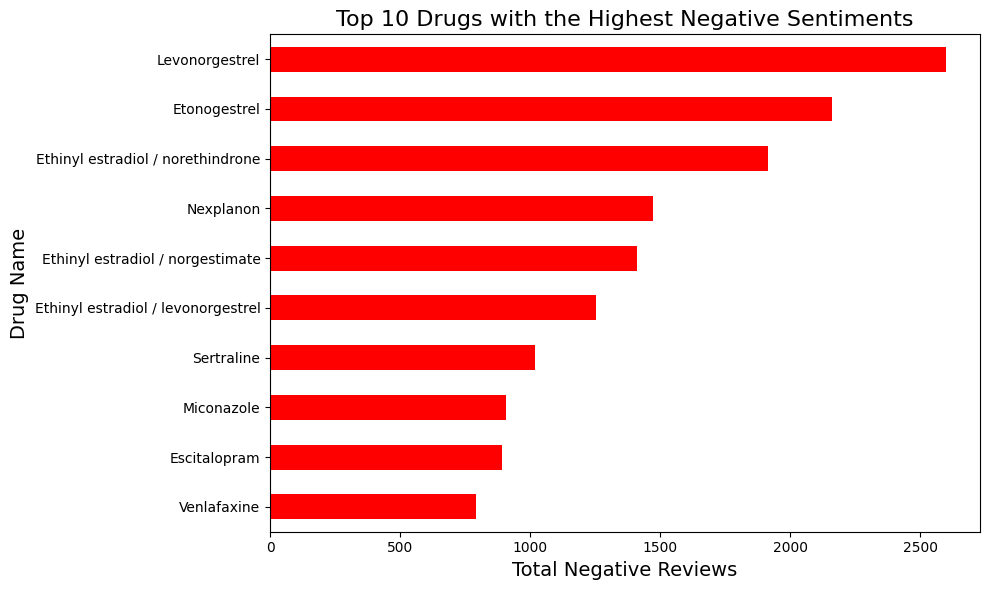

In [20]:
# Group by drugName and Sentiment
sentiment_counts = df.groupby([drug_column, "Sentiment"]).size().unstack(fill_value=0)

# Sort the data by the "Negative" sentiment count in descending order
top_negative = sentiment_counts.sort_values(by="Negative", ascending=False).head(10)

# Display the result
print("Top 10 Drugs with the Highest Negative Sentiments:")
print(top_negative)

# Plotting the top 10 drugs with the highest negative sentiment
plt.figure(figsize=(10, 6))
top_negative["Negative"].plot(kind="barh", color="red")
plt.title("Top 10 Drugs with the Highest Negative Sentiments", fontsize=16)
plt.xlabel("Total Negative Reviews", fontsize=14)
plt.ylabel("Drug Name", fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()

# Show the plot
plt.show()
